In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/test/data.csv")

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
# price를 정수값으로 변환하고 ?로 들어간 값은 평균을 적용
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

# **Calculating percentiles(백분위수 계산)**

- 백분위수란 크기가 있는 값들로 이뤄진 자료를 순서대로 나열했을 때 백분율로 나타낸 특정 위치의 값
- 데이터 세트에서 특정값 아래에 있는 값의 백분율을 측정하여 계산 가능
- 계산을 위해서는 일단 목록이 정렬되어 있는지 확인 필요
- 예를들어 80번째 백분위 수가 130이라고 한다면 값의 80%는 130미만이라는 의미 
- 다음의 공식을 사용

   X의 백분위수 계산 공식 = (X보다 작은 값의 개수 / 전체 개수) * 100

- 주어진 데이터가 1, 2, 2, 3, 4, 5, 6, 7, 7, 8, 9, 10 이라면, 4의 백분위수는 (4/12)*100 = 33.33%
- 이것은 단순히 데이터의 33.33%가 4보다 작다는 것을 의미


In [7]:
height = df["height"]
percentile = np.percentile(height, 50,)
print(percentile)

54.1


# *Quartiles(사분위수)**

- 사분위수는 오름차순으로 정렬된 데이터셋이 주어지면 분기로 분할한 값
- 각 분할이 데이터셋의 25%가 되도록 3개의 데이터 포인트를 참조
- Q1, Q2, Q3를 기반으로 변동값을 측정하기 위해 다음 식을 사용

  IQR = Q3 - Q1

- IQR은 Interquartile Range(사분범위)의 약자로, 분포의 양끝을 제외한 범위

In [8]:
price = df.price.sort_values()
Q1 = np.percentile(price, 25)
Q2 = np.percentile(price, 50)
Q3 = np.percentile(price, 75)

IQR = Q3 - Q1
IQR

8712.0

# *Visualizing quartiles(사분위수 시각화)**

- 박스를 이용하여 시각화
- 박스의 길이는 분산, 중앙값을 기준으로 비대칭도
- 최하단 라인, 최상단 라인, 25% 이전 구간, 75% 이후 구간 표시
- 평균값과 이상점 표시

In [9]:
A = [34,35,35,35,35,35,36,36,37,37,37,37,37,38,38,38,39,39,
              40,40,40,40,40,41,42,42,42,42,42,42,42,42,43,43,43,43,44,44,44,44,44,44,45,
              45,45,45,45,46,46,46,46,46,46,47,47,47,47,47,47,48,48,48,48,48,49,49,49,49,
              49,49,49,49,52,52,52,53,53,53,53,53,53,53,53,54,54,
              54,54,54,54,54,55,55,55,55,55,56,56,56,56,56,56,57,57,57,58,58,59,59,59,59,
              59,59,59,60,60,60,60,60,60,60,61,61,61,61,61,62,62,63,63,63,63,63,64,64,64,
              64,64,64,64,65,65,65,66,66,67,67,68,68,68,68,68,68,68,69,70,71,71,71,72,72,
              72,72,73,73,74,75,76,76,76,76,77,77,78,79,79,80,80,81,84,84,85,85,87,87,88]
            
B = [49,49,50,51,51,52,52,52,52,53,54,54,55,55,55,55,56,
                 56,56,56,56,57,57,57,58,58,58,59,59,59,60,60,60,60,60,60,60,61,61,61,62,
                 62,62,62,63,63,67,67,68,68,68,68,68,68,69,69,69,69,69,69,
                 70,71,71,71,71,72,72,72,72,73,73,73,73,74,74,74,74,74,75,75,75,76,76,76,
                 77,77,78,78,78,79,79,79,80,80,82,83,85,88]
                 
C = [56,57,58,58,58,60,60,61,61,61,61,61,61,62,62,62,62,
                63,63,63,63,63,64,64,64,64,65,65,66,66,67,67,67,67,67,67,67,68,68,68,69,
                69,70,70,70,71,71,71,73,73,74,75,75,76,76,77,77,77,78,78,81,82,
                84,89,90]


scores_array = [A, B, C]
scores = np.asarray(scores_array, dtype=object)




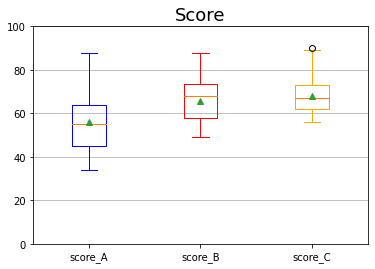

In [10]:


box = plt.boxplot(scores, showmeans=True, whis=1.5) # showmeans=True: 평균값 표기 / whis=1.5: 이상점 설정 기준(value < Q1-1.5*IQR or value > Q3 +1.5*IQR)

plt.setp(box['boxes'][0], color='blue') # 박스 컬러
plt.setp(box['caps'][0], color='blue') # 최하단 라인 컬러
plt.setp(box['caps'][1], color='blue') # 최상단 라인 컬러
plt.setp(box['whiskers'][0], color='blue') # 25% 이전 구간 컬러
plt.setp(box['whiskers'][1], color='blue') # 75% 이후 구간 컬러

plt.setp(box['boxes'][1], color='red')
plt.setp(box['caps'][2], color='red')
plt.setp(box['caps'][3], color='red')
plt.setp(box['whiskers'][2], color='red')
plt.setp(box['whiskers'][3], color='red')

plt.setp(box['boxes'][2], color='orange')
plt.setp(box['caps'][4], color='orange')
plt.setp(box['caps'][5], color='orange')
plt.setp(box['whiskers'][4], color='orange')
plt.setp(box['whiskers'][5], color='orange')

plt.ylim([0, 100]) 
plt.grid(True, axis='y') # Y축을 기준으로 그리드 생성
plt.title('Score', fontsize=18)      
plt.xticks([1,2,3], ['score_A','score_B','score_C'])

plt.show()